## SocialStock Data Analysis

This notebook has the following objectives:

visualize the social network each day of the simulation
extract quantitative information about its evolution

In [137]:
import networkx as nx
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt

In [168]:
data = "/Users/Cinus/University/Magistrale_Sistemi_Complessi_Torino/MAS/GitHub/SocialStock/data/c2r10n100"

file = open( data + "Int.txt")
tit = file.readline()

X = []
nn = {}

for l in file.readlines() :
    line = l.split(":")
    line[0:4] = [int(i) for i in line[0:4]]
    line[4] = [int(i) for i in line[4][1:-2].split(", ")]
    X.append(line[0:4])
    nn[ (line[0],line[1]) ] = line[4]

X = np.array(X)
X = pd.DataFrame(X) 

tit = tit.split("-")[:-1]
X.columns = tit
X.sort_values(["uDays" , "ind"])

X1 = X[X.uDays==1]

users = X1.shape[0]
uDays = int(X.shape[0]/users)
Deg = np.array(X1.sort_values("ind").deg)

nearest_neighbours = {}

for d in range(uDays) :
    nearest_neighbours[d+1] = {}
    for u in range(users) :
        nearest_neighbours[d+1][u] = nn[(d+1,u)]

In [144]:
#OPINION MATRIX 
companies=2
file = open( data + ".txt")
tit = file.readline()

Op = []

for l in file.readlines() :
    line = (l.split(","))
    line[companies-1] = line[companies-1][:-2]
    line = [float(i) for i in line]
    Op.append(line)
    
O = {}

index = 0
for d in range(uDays) :
    O[d+1] = np.array(Op[index:(index + users)])
    index = index + users

#O is a dictionary with 
#key : day
#value : opinion matrix of that day 

In [ ]:
##nearest_neighbours[4]

#dizionario dei nearest neighbours nel quarto giorno
#si hanno tante key-value pairs quante gli user

# key : indice dello user
# value : lista con gli inidici della callout list 

In [145]:
X_ord = X.sort_values(["uDays" , "ind"])

## Degree Distribution

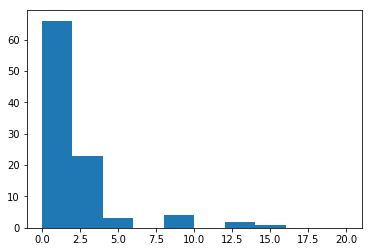

In [147]:
plt.hist(X1.deg, range=(0,20))
plt.show()

## Network of Day 1

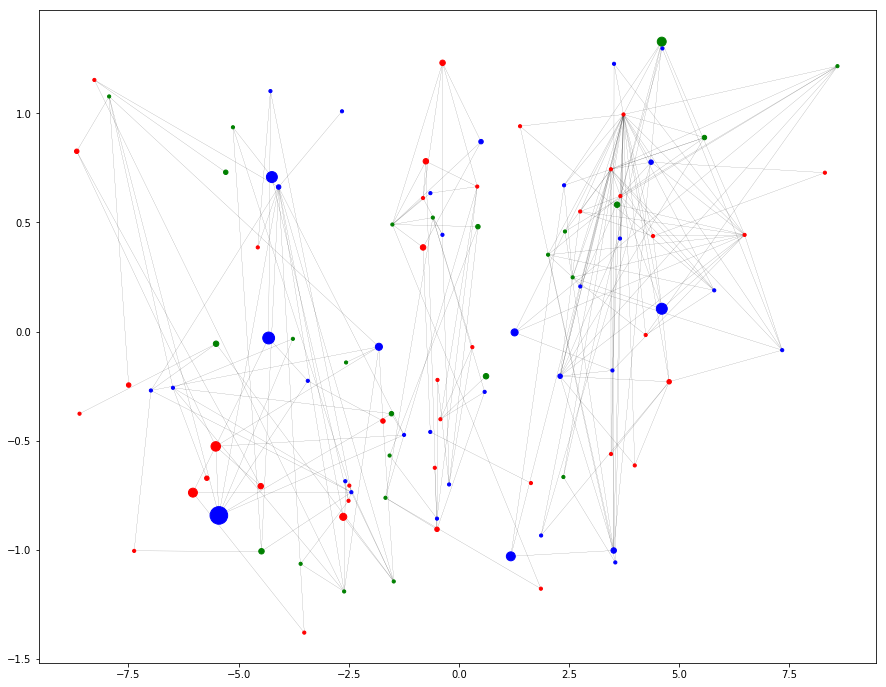

In [149]:
def Graphday(X , day) :
    G1 = nx.Graph()
    X1 = X[X.uDays == day]
    X1 = X1.sort_values(["ind"])

    for u in range(users) : 
            for n in nearest_neighbours[day][u] :
                G1.add_edge(u,n)

    pos1 = nx.circular_layout(G1)
    incols = np.array(["red","green","blue"])

    m = np.sum(O[day] , axis =1)
    for i in range(users) :
        pos1[i][0] = m[i] + np.random.normal(scale =0.2)
        pos1[i][1] += np.random.normal(scale =0.2)

    plt.figure(1,figsize=(15,12)) 

    nx.draw_networkx(G1,
                     node_size= X1.deg*10, 
                     pos = pos1,
                     node_color= incols[np.array(X1.incl +1)], 
                     with_labels=False,
                     width=0.1)
    
Graphday(X,1)
plt.show()

# Plot inclDistr vs time

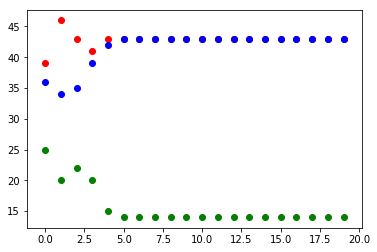

In [151]:
IncDistr = []
for d in range(uDays):
    IncDistr.append(np.unique(X[X.uDays==d+1].incl, return_counts= True)[1])
IncDistr = np.array(IncDistr)

plt.scatter(y=IncDistr[:,0] , x=range(uDays) , color = "red" )
plt.scatter(y=IncDistr[:,1] , x=range(uDays) , color = "green")
plt.scatter(y=IncDistr[:,2] , x=range(uDays) , color = "blue")

plt.show()

#### Equilibrium time

In [167]:
t=0
IncDistr_t=[]
for i in IncDistr:
    if( np.array_equal(i,IncDistr_t) ):
        print('Equilibrium time is '+ str(t))
        break
    else: 
        IncDistr_t=[j for j in i]
        t+=1

Equilibrium time is 6
